# Loan status Classification / Bank Lending

Loan Status Classification Here in this notebook we take a look at the data from a bank/financial organization of all their loans. We explore various features about the borrowers like credit score, mortgage, annual income, years of employment and try to train our classifer to predict if the loan would be paid or not.

## Step 1:- Define the objective of the problem

### Questions to ask:- 

#### 1.What are we trying to predict ? 

#### Ans:- try to train our classifer to predict if the loan would be paid or not.

#### 2.What are the Target Features?
#### 3.What is the input data?
#### 4.What kind of problem are we facing? And which type of problem is this?
#### Ans:- Classification Problem

### Imorting Libraries

In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

# Any results you write to the current directory are saved as output.

### Importing Dataset

In [2]:
dataframe = pd.read_csv('credit_train.csv')

In [3]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


### Exploratory Data Analysis

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [5]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [6]:
print("Number of rows:", dataframe.shape[0])
print("Number of columns:", dataframe.shape[1])

Number of rows: 100514
Number of columns: 19


#### Here, we see something strange. If you notice the average credit scoe is 1076+ which is strange considering the credit score are within th range of 300-850. Let's take a look and try to find sense of the credit score data and check if there are any score that are greater than 800.

In [7]:
df = dataframe[dataframe['Credit Score']>800]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.00,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,nan,6.00,0.00,215308.00,272448.00,0.00,0.00
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.00,Short Term,7120.00,537472.00,10+ years,Rent,Debt Consolidation,5777.90,14.80,nan,4.00,0.00,132468.00,164406.00,0.00,0.00
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.00,Long Term,6610.00,527839.00,10+ years,Rent,Debt Consolidation,14207.63,17.00,48.00,9.00,0.00,254277.00,379918.00,0.00,0.00
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.00,Short Term,7380.00,728726.00,4 years,Rent,major_purchase,10135.36,11.40,nan,8.00,0.00,104633.00,199936.00,0.00,0.00
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.00,Long Term,7370.00,1028774.00,6 years,Home Mortgage,Debt Consolidation,22632.99,19.30,nan,5.00,0.00,474658.00,742720.00,0.00,0.00


#### As we can see, it looks like some of the credit score are just scaled up by 10. For the ease of our calculation we can consider, scaling them back is accurate.

In [8]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [9]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,716.29,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,28.30,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,703.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,722.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,738.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


##### Now we can see our average credit score is within a normal credit score range so we can go further with our preprocessing.

In [10]:
dataframe.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.00,Short Term,729.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,nan,6.00,0.00,215308.00,272448.00,0.00,0.00
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.00,Short Term,730.00,1184194.00,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.60,10.00,13.00,1.00,122170.00,272052.00,1.00,0.00
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.00,Long Term,nan,nan,< 1 year,Home Mortgage,Buy House,14806.13,8.20,8.00,15.00,0.00,193306.00,864204.00,0.00,0.00
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.00,Short Term,678.00,2559110.00,2 years,Rent,Debt Consolidation,18660.28,22.60,33.00,4.00,0.00,437171.00,555038.00,0.00,0.00
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.00,Short Term,739.00,1454735.00,< 1 year,Rent,Debt Consolidation,39277.75,13.90,nan,20.00,0.00,669560.00,1021460.00,0.00,0.00


In [11]:
#Define in which columns to look for missing values.

dataframe.dropna(subset=['Loan Status'], inplace = True)

In [12]:
print("Number of rows:", dataframe.shape[0])
print("Number of columns:", dataframe.shape[1])

Number of rows: 100000
Number of columns: 19


In [13]:
dataframe.head(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.00,Short Term,729.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,nan,6.00,0.00,215308.00,272448.00,0.00,0.00
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.00,Short Term,730.00,1184194.00,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.60,10.00,13.00,1.00,122170.00,272052.00,1.00,0.00
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.00,Long Term,nan,nan,< 1 year,Home Mortgage,Buy House,14806.13,8.20,8.00,15.00,0.00,193306.00,864204.00,0.00,0.00
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.00,Short Term,678.00,2559110.00,2 years,Rent,Debt Consolidation,18660.28,22.60,33.00,4.00,0.00,437171.00,555038.00,0.00,0.00
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.00,Short Term,739.00,1454735.00,< 1 year,Rent,Debt Consolidation,39277.75,13.90,nan,20.00,0.00,669560.00,1021460.00,0.00,0.00


In [14]:
le = preprocessing.LabelEncoder()
dataframe['Loan Status'] = le.fit_transform(dataframe['Loan Status'])

In [15]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


#### Loan Status is the categorical variable here denoting if the certain variable is paid off or not. In this notebook, we aim to predict that as our final output.

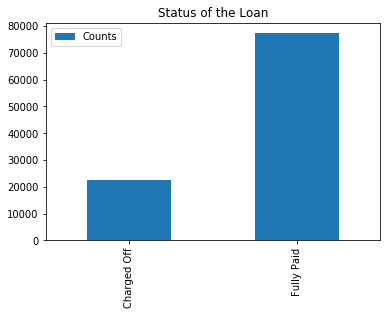

In [16]:
coffvalue = dataframe[dataframe['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = dataframe[dataframe['Loan Status'] == 1]['Loan Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

In [17]:
print("Value counts for each term: \n",dataframe['Term'].value_counts())
print("Missing data in loan term:",dataframe['Term'].isna().sum())

Value counts for each term: 
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [18]:
dataframe['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [19]:
scount = dataframe[dataframe['Term'] == 0]['Term'].count()
lcount = dataframe[dataframe['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


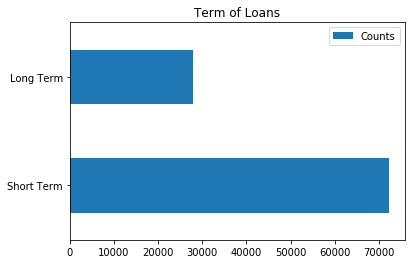

In [20]:
termDF.plot(kind="barh", title="Term of Loans")

#### Since credit score is one of the important part of our analysis, we first try to explore and handle our missing data before processing further with anything.

In [21]:
print("There are", dataframe['Credit Score'].isna().sum(), "null values for Credit score.")

There are 19154 null values for Credit score.


***Since there are multiple ways to handle the missing data, one of which is to fill in the average of the column in the place of missing data. Here we follow the same concept but with a small tweak. We asume that the credit score of people having short term loan wouldn't be the same as credit score of people having long term loans. Hence we take separate average of credit score of people with short term loan and separate average of people with long term loan and then fill the missing credit score looking up at the term of the loan.***

In [22]:
cscoredf = dataframe[dataframe['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [23]:
lscoredf = dataframe[dataframe['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [24]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


### Use of Lambda Function in python
#### We use lambda functions when we require a nameless function for a short period of time

In [25]:
do_nothing = lambda: None

In [26]:
dataframe.loc[(dataframe.Term ==0) & (dataframe['Credit Score'].isnull()),'Credit Score'] = stermAVG

In [27]:
dataframe.loc[(dataframe.Term ==1) & (dataframe['Credit Score'].isnull()),'Credit Score'] = ltermAVG

##### Since our problem is a classification problem, we can't have continuos variables in our dataframe. After the calculation of the missing variables we give our credit scores a range based on Experian's Credit Score Range.

In [28]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

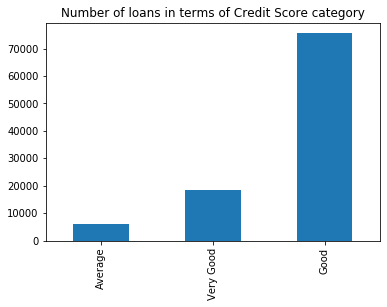

In [29]:
dataframe['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

##### Next up we look at our annual income column and fill up the missing values with the average of the column.

In [30]:
print("There are",dataframe['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [31]:
dataframe['Annual Income'].fillna(dataframe['Annual Income'].mean(), inplace=True)

In [32]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,1378276.56,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,Very Good,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,Good,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,Good,1378276.56,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [33]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Score'], drop_first = True))

In [34]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,...,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,1378276.56,10+ years,Home Mortgage,Debt Consolidation,...,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,Very Good,2231892.00,8 years,Own Home,Debt Consolidation,...,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,Good,806949.00,3 years,Own Home,Debt Consolidation,...,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,Good,1378276.56,5 years,Rent,Debt Consolidation,...,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0


### Since our values were only adjectives, we give it new names to make it more clear.

In [35]:
dataframe.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,...,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,1378276.56,10+ years,Home Mortgage,Debt Consolidation,...,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,Very Good,2231892.00,8 years,Own Home,Debt Consolidation,...,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,Good,806949.00,3 years,Own Home,Debt Consolidation,...,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,Good,1378276.56,5 years,Rent,Debt Consolidation,...,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.00,0,Good,475437.00,7 years,Own Home,other,...,22.30,nan,5.00,0.00,47766.00,658548.00,0.00,0.00,1,0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.00,0,Good,1289416.00,1 year,Rent,Debt Consolidation,...,9.40,21.00,22.00,0.00,153045.00,509234.00,0.00,0.00,1,0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.00,0,Very Good,1150545.00,6 years,Rent,Debt Consolidation,...,18.80,18.00,12.00,1.00,109554.00,537548.00,1.00,0.00,0,1
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.00,0,Very Good,1717524.00,9 years,Rent,Debt Consolidation,...,15.00,nan,8.00,0.00,404225.00,738254.00,0.00,0.00,0,1


In [36]:
dataframe = dataframe.drop(['Credit Score'], axis=1)

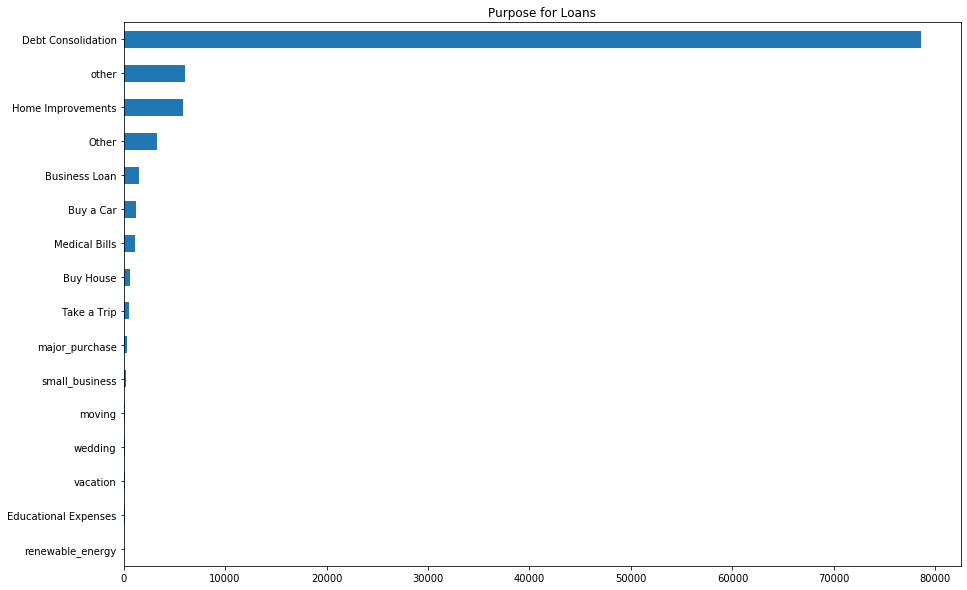

In [37]:
dataframe['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

In [38]:
purposeloanstatus = dataframe[['Purpose','Loan Status']]
purposeloanstatus.head()

,Purpose,Loan Status
0,Home Improvements,1
1,Debt Consolidation,1
2,Debt Consolidation,1
3,Debt Consolidation,1
4,Debt Consolidation,1


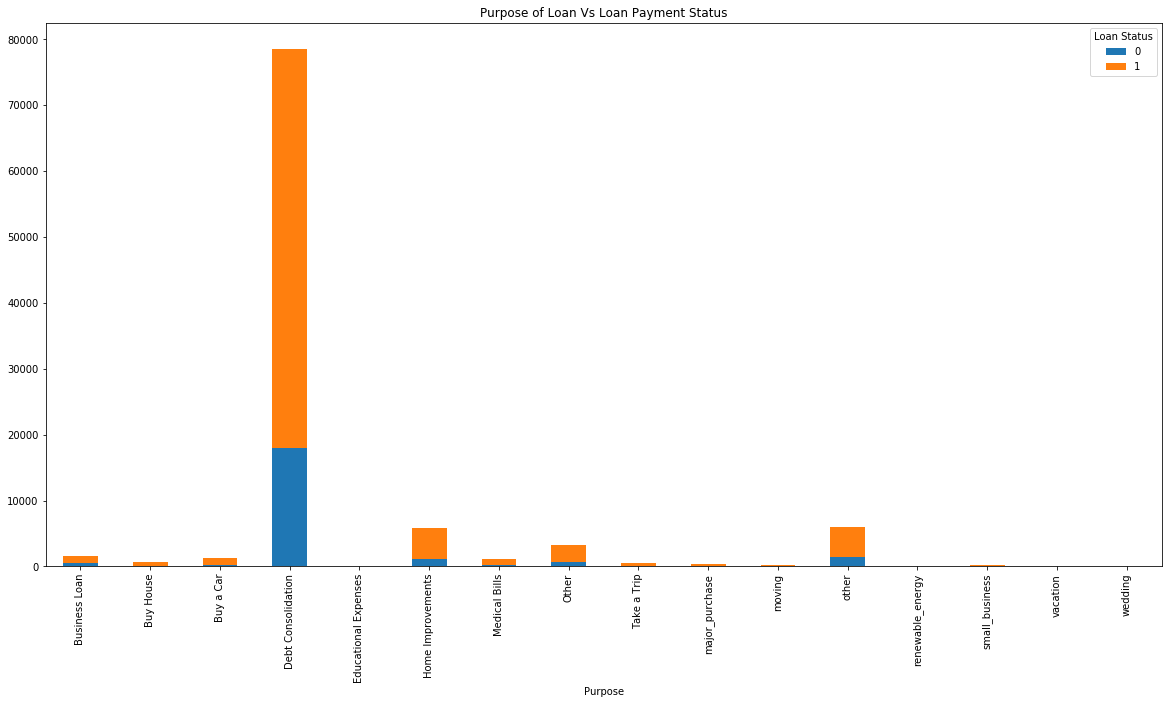

In [39]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), title="Purpose of Loan Vs Loan Payment Status", )

#### Next up, we take a look at the Home ownership status of the people who have taken loan and try to visualize it.

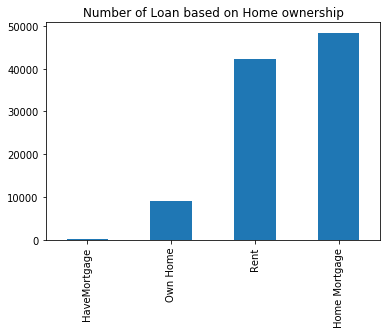

In [40]:
dataframe['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

In [41]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Home Ownership'],drop_first = True))

In [42]:
dataframe = dataframe.drop(['Home Ownership'], axis=1)

In [43]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,8 years,Home Improvements,5214.74,17.20,...,1.00,228190.00,416746.00,1.00,0.00,1,0,1,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,1378276.56,10+ years,Debt Consolidation,33295.98,21.10,...,0.00,229976.00,850784.00,0.00,0.00,1,0,1,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,8 years,Debt Consolidation,29200.53,14.90,...,1.00,297996.00,750090.00,0.00,0.00,0,1,0,1,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,806949.00,3 years,Debt Consolidation,8741.90,12.00,...,0.00,256329.00,386958.00,0.00,0.00,1,0,0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,1378276.56,5 years,Debt Consolidation,20639.70,6.10,...,0.00,253460.00,427174.00,0.00,0.00,1,0,0,0,1


##### Moving forward, age of employment is one of the major factor in deciding the person's financial stability and secure income sources.  Here our data was a String with non uniform spread. first we need to extract the given numbers from our data and then give it a unform range to convert it into a categorical variable

In [44]:
dataframe['Years in current job']=dataframe['Years in current job'].str.extract(r"(\d+)")
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,8,Home Improvements,5214.74,17.20,...,1.00,228190.00,416746.00,1.00,0.00,1,0,1,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,1378276.56,10,Debt Consolidation,33295.98,21.10,...,0.00,229976.00,850784.00,0.00,0.00,1,0,1,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,8,Debt Consolidation,29200.53,14.90,...,1.00,297996.00,750090.00,0.00,0.00,0,1,0,1,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,806949.00,3,Debt Consolidation,8741.90,12.00,...,0.00,256329.00,386958.00,0.00,0.00,1,0,0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,1378276.56,5,Debt Consolidation,20639.70,6.10,...,0.00,253460.00,427174.00,0.00,0.00,1,0,0,0,1


In [45]:
dataframe['Years in current job'] = dataframe['Years in current job'].astype(float)
# dataframe['Years in current job'].fillna(dataframe['Years in current job'].mean(), inplace = True)

In [47]:
expmean = dataframe['Years in current job'].mean()
expmean

5.977594019503435

In [48]:
dataframe['Years in current job'].fillna(expmean, inplace=True)

#### Now That we have a numerical value for our Employment Age, we use a uniform range to convert it into categories.

In [49]:
dataframe['Employment History'] = dataframe['Years in current job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))

In [51]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Employment History
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,8.00,Home Improvements,5214.74,17.20,...,228190.00,416746.00,1.00,0.00,1,0,1,0,0,Emp Senior
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,1378276.56,10.00,Debt Consolidation,33295.98,21.10,...,229976.00,850784.00,0.00,0.00,1,0,1,0,0,Emp Senior
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,8.00,Debt Consolidation,29200.53,14.90,...,297996.00,750090.00,0.00,0.00,0,1,0,1,0,Emp Senior
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,806949.00,3.00,Debt Consolidation,8741.90,12.00,...,256329.00,386958.00,0.00,0.00,1,0,0,1,0,Emp Level Jr.
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,1378276.56,5.00,Debt Consolidation,20639.70,6.10,...,253460.00,427174.00,0.00,0.00,1,0,0,0,1,Emp Level Mid


In [52]:
dataframe = dataframe.drop(['Years in current job'], axis=1)

#### Now that we have the categories for our employment history, we use one hot encoding on the column.

In [53]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Employment History'],drop_first = True))

#### we then drop the Employment History column.

In [55]:
dataframe = dataframe.drop(['Employment History'], axis=1)
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,...,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,Home Improvements,5214.74,17.20,nan,...,416746.00,1.00,0.00,1,0,1,0,0,0,1
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,1378276.56,Debt Consolidation,33295.98,21.10,8.00,...,850784.00,0.00,0.00,1,0,1,0,0,0,1
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,Debt Consolidation,29200.53,14.90,29.00,...,750090.00,0.00,0.00,0,1,0,1,0,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,806949.00,Debt Consolidation,8741.90,12.00,nan,...,386958.00,0.00,0.00,1,0,0,1,0,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,1378276.56,Debt Consolidation,20639.70,6.10,nan,...,427174.00,0.00,0.00,1,0,0,0,1,1,0


#### If we take a look at our data, there are columns like Loan ID, Customer ID which isn't important for our analysis. While we can argue in some cases "purpose" of loan could be one deciding factor but here we consider it to be unimportant and drop that as well.

In [56]:
dataframe = dataframe.drop(['Loan ID','Customer ID','Purpose'], axis=1)

In [57]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior
0,1,445412.00,0,1167493.00,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0,1,0,0,0,1
1,1,262328.00,0,1378276.56,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0,1,0,0,0,1
2,1,99999999.00,0,2231892.00,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1,0,1,0,0,1
3,1,347666.00,1,806949.00,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0,0,1,0,0,0
4,1,176220.00,0,1378276.56,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0,0,0,1,1,0


#### Next up is number of credit problems reported for each individual loanee. We split that into three categories with 0 being None, 1-5 as Some and more than 5 to be major credit problems.

In [60]:
dataframe['Credit Problems'] = dataframe['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,Credit Problems
0,1,445412.00,0,1167493.00,5214.74,17.20,nan,6.00,1.00,228190.00,...,1.00,0.00,1,0,1,0,0,0,1,Some Credit promblem
1,1,262328.00,0,1378276.56,33295.98,21.10,8.00,35.00,0.00,229976.00,...,0.00,0.00,1,0,1,0,0,0,1,No Credit Problem
2,1,99999999.00,0,2231892.00,29200.53,14.90,29.00,18.00,1.00,297996.00,...,0.00,0.00,0,1,0,1,0,0,1,Some Credit promblem
3,1,347666.00,1,806949.00,8741.90,12.00,nan,9.00,0.00,256329.00,...,0.00,0.00,1,0,0,1,0,0,0,No Credit Problem
4,1,176220.00,0,1378276.56,20639.70,6.10,nan,15.00,0.00,253460.00,...,0.00,0.00,1,0,0,0,1,1,0,No Credit Problem


In [59]:
dataframe['Credit Problems'].value_counts()

No Credit Problem        86035
Some Credit promblem     13879
Major Credit Problems       86
Name: Credit Problems, dtype: int64

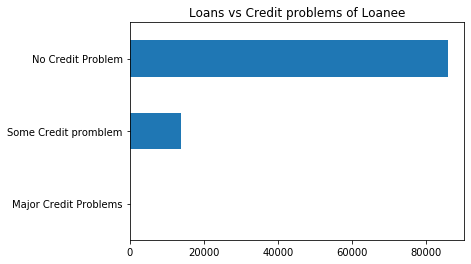

In [61]:
dataframe['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

#### Looking at the graph above, we establish a common asumption that loans are generally not given to people having credit problems. Next up, we convert Credit Problems into discrete variables. 

In [63]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Problems'],drop_first = True))

In [64]:
dataframe = dataframe.drop(['Credit Problems','Number of Credit Problems'], axis=1)

In [65]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,1,445412.00,0,1167493.00,5214.74,17.20,nan,6.00,228190.00,416746.00,...,0.00,1,0,1,0,0,0,1,0,1
1,1,262328.00,0,1378276.56,33295.98,21.10,8.00,35.00,229976.00,850784.00,...,0.00,1,0,1,0,0,0,1,1,0
2,1,99999999.00,0,2231892.00,29200.53,14.90,29.00,18.00,297996.00,750090.00,...,0.00,0,1,0,1,0,0,1,0,1
3,1,347666.00,1,806949.00,8741.90,12.00,nan,9.00,256329.00,386958.00,...,0.00,1,0,0,1,0,0,0,1,0
4,1,176220.00,0,1378276.56,20639.70,6.10,nan,15.00,253460.00,427174.00,...,0.00,1,0,0,0,1,1,0,1,0


#### Another important feature for financial stability identification is the years of credit history. We look at the given credit age of individuals and categorize them using one hot encoding.

In [66]:
dataframe['Credit Age'] = dataframe['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [67]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Age'],drop_first = True))

In [68]:
dataframe = dataframe.drop(['Credit Age','Years of Credit History'], axis =1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.00,0,1167493.00,5214.74,nan,6.00,228190.00,416746.00,1.00,...,0,1,0,0,0,1,0,1,0,0
1,1,262328.00,0,1378276.56,33295.98,8.00,35.00,229976.00,850784.00,0.00,...,0,1,0,0,0,1,1,0,0,0
2,1,99999999.00,0,2231892.00,29200.53,29.00,18.00,297996.00,750090.00,0.00,...,1,0,1,0,0,1,0,1,1,0
3,1,347666.00,1,806949.00,8741.90,nan,9.00,256329.00,386958.00,0.00,...,0,0,1,0,0,0,1,0,1,0
4,1,176220.00,0,1378276.56,20639.70,nan,15.00,253460.00,427174.00,0.00,...,0,0,0,1,1,0,1,0,1,0


In [69]:
dataframe = dataframe.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [70]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.00,0,1167493.00,1.00,0.00,1,0,1,0,0,0,1,0,1,0,0
1,1,262328.00,0,1378276.56,0.00,0.00,1,0,1,0,0,0,1,1,0,0,0
2,1,99999999.00,0,2231892.00,0.00,0.00,0,1,0,1,0,0,1,0,1,1,0
3,1,347666.00,1,806949.00,0.00,0.00,1,0,0,1,0,0,0,1,0,1,0
4,1,176220.00,0,1378276.56,0.00,0.00,1,0,0,0,1,1,0,1,0,1,0


In [71]:
dataframe['Tax Liens'] = dataframe['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [72]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Tax Liens'],drop_first = True))

In [73]:
dataframe = dataframe.drop(['Tax Liens'],axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
0,1,445412.00,0,1167493.00,1.00,1,0,1,0,0,0,1,0,1,0,0,1,0
1,1,262328.00,0,1378276.56,0.00,1,0,1,0,0,0,1,1,0,0,0,1,0
2,1,99999999.00,0,2231892.00,0.00,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,347666.00,1,806949.00,0.00,1,0,0,1,0,0,0,1,0,1,0,1,0
4,1,176220.00,0,1378276.56,0.00,1,0,0,0,1,1,0,1,0,1,0,1,0


#### Furthermore, we take a look at nuber of bankruptcies filed by people and categorize them.

In [75]:
dataframe['Bankruptcies'] = dataframe['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [76]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Bankruptcies'],drop_first = True))

In [77]:
dataframe = dataframe.drop(['Bankruptcies'],axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1,445412.00,0,1167493.00,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,1,262328.00,0,1378276.56,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
2,1,99999999.00,0,2231892.00,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,1,347666.00,1,806949.00,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
4,1,176220.00,0,1378276.56,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0


In [78]:
dataframe.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,0.77,11760447.39,0.28,1378276.56,0.76,0.18,0.48,0.09,0.42,0.22,0.46,0.86,0.14,0.50,0.00,0.98,0.02,0.89,0.11
std,0.42,31783942.55,0.45,972297.42,0.43,0.39,0.50,0.29,0.49,0.42,0.50,0.35,0.35,0.50,0.04,0.14,0.13,0.32,0.31
min,0.00,10802.00,0.00,76627.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,179652.00,0.00,931180.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
50%,1.00,312246.00,0.00,1369919.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
75%,1.00,524942.00,1.00,1512704.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,1.00,99999999.00,1.00,165557393.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**We already know we're predicting categorical variables hence we have to convert our cateorical variables into discrete. Next up we try to convert annual income and total loan amount into discrete variables. 
There are some calculation we do before deciding a range from the categories. If we take a look, we have some data that are outliers and are way off the other loan amounts. so we try to calculate the average and standard deviation without the outlier. 
We asume : Mean - 1 standard deviation = low income line
                    Mean + 1 standard deviation = high income line
  and similar for the loan amount as well.
**

In [79]:
meanxoutlier = dataframe[dataframe['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
meanxoutlier

1376634.7522600775

In [80]:
stddevxoutlier = dataframe[dataframe['Annual Income'] < 99999999.00 ]['Annual Income'].std()
stddevxoutlier

822080.177474152

In [81]:
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [82]:
poorline

554554.5747859256

In [83]:
richline

2198714.9297342296

In [84]:
dataframe['Annual Income'] = dataframe['Annual Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))

In [85]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Annual Income'],drop_first = True))

In [86]:
dataframe = dataframe.drop(['Annual Income'], axis=1)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income
0,1,445412.00,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,262328.00,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,99999999.00,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,347666.00,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1,176220.00,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0


In [87]:
lmeanxoutlier = dataframe[dataframe['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = dataframe[dataframe['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084723 498575.76557037106


In [88]:
dataframe['Current Loan Amount'] = dataframe['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [89]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Current Loan Amount'],drop_first = True))

In [90]:
dataframe = dataframe.drop(['Current Loan Amount'], axis=1)

In [91]:
dataframe.head()

,Loan Status,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0


Now we can see that we have all categorical values for our dataframe we can divide it into training and test set and plug into some classification algorithm.

In [92]:
y = dataframe['Loan Status']
X = dataframe.drop(['Loan Status'],axis=1)

#### Train Test Split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modeling

### KNN 

In [98]:
knnclassifier = KNeighborsClassifier(n_neighbors=int(X.shape[1]/2))
knnclassifier.fit(X_train, y_train)
prediction = knnclassifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, prediction))
# y_true = y_test


Accuracy Score:  0.7495151515151515


In [99]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,cohen_kappa_score

In [100]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, prediction)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[  549  6985]
 [ 1281 24185]]


In [101]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, prediction).ravel()
print(tneg,fpos,fneg,tpos)

549 6985 1281 24185


### Logistic Regression

In [102]:
lregclassifier = LogisticRegression()
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.7717272727272727


In [103]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, lregprediction)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[    5  7529]
 [    4 25462]]


In [104]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

5 7529 4 25462


### SVM(Linear Kernal)

In [121]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel ='rbf')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.7716969696969697


In [122]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, pred)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[    0  7534]
 [    0 25466]]


### XGBOOST

In [107]:
XGBclf = XGBClassifier()
XGBclf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
XGBpred = XGBclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, XGBpred))

Accuracy Score:  0.7701212121212121


In [109]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, XGBpred).ravel()
print(tneg,fpos,fneg,tpos)

81 7453 133 25333


### Scholastic Gradient Decent

In [110]:
SGDclf = SGDClassifier(loss='modified_huber',shuffle=True)
SGDclf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [111]:
SGDpred = SGDclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, SGDpred))

Accuracy Score:  0.7716060606060606


In [112]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, SGDpred).ravel()
print(tneg,fpos,fneg,tpos)

2 7532 5 25461


In [113]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, SGDpred)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[    2  7532]
 [    5 25461]]


In [116]:
total1=sum(sum(cm1))
#Accuracy
print('Accuracy : ',accuracy_score(y_test, SGDpred) *100,'%')

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

print('Kappa value : ', cohen_kappa_score(y_test, SGDpred))

Accuracy :  77.16060606060606 %
Sensitivity :  0.0002654632333421821
Specificity :  0.9998036597816696
Kappa value :  0.00010663020710099946


In [117]:
#Classification report
print(classification_report(y_test, SGDpred))

              precision    recall  f1-score   support

           0       0.29      0.00      0.00      7534
           1       0.77      1.00      0.87     25466

    accuracy                           0.77     33000
   macro avg       0.53      0.50      0.44     33000
weighted avg       0.66      0.77      0.67     33000



In [120]:
#K-Fold cross validation
accuracies = cross_val_score(estimator = SGDclf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.46 %
Standard Deviation: 0.02 %
